# In this question, you will be implementing a bloom filter and calculate false positive rate on varying its length


In [10]:
import pandas as pd
path = '/Users/zq84/CS6386/HW1/datarepo/'
df=pd.read_csv(path+'pvqr-7yc4.csv')

/var/folders/dk/fythzssx3lq37wtzhfb9yl6c0000gq/T/ipykernel_27130/2071717546.py:3: DtypeWarning: Columns (17,18,20,22,23,29,30,31,32,36,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(path+'pvqr-7yc4.csv')


We will be using insert_lst as the set of elements to insert into the filter

In [11]:
insert_lst = (list(df['Summons Number'].values))

# Part 1: Implement the class file
Below is the bloom filter class. You have to implement two functions

i. Add: which adds an element to the filter

ii. lookup: which checks for the presence of an element in the filter

### Information about hashing: 
hash_params is a list of k elements, where each element corresponds to the parameters of a hash function. 
You can use the calculate_hash function to hash each element. Specifically, it takes an element along with any hash parameter as input and returns its hash value.

In [12]:
from bitarray import bitarray
import hashlib
import random
import math
random.seed(0)

class BloomFilter(object):
    def __init__(self, size, hash_count):
        """
        size: size of bit array
        hash_count: number of hash functions to use
        """
        self.size = size
        self.hash_count = hash_count
        self.bit_array = bitarray(size)
        self.bit_array.setall(0)
        self.hash_param = []
        i=0
        while i<hash_count:
            a=random.randint(1,9999)
            b=random.randint(1,9999)
            p = self.generate_large_prime(30)
            self.hash_param.append((a,b,p))
            i+=1
            
    def generate_large_prime(self, bit_size):

        random_number = random.getrandbits(bit_size)
        
        while not self.is_prime(random_number):
            random_number = random.getrandbits(bit_size)
        return random_number

    def is_prime(self, number):
        if number % 2 == 0:
            return False


        for i in range(3, int(math.sqrt(number)) + 1, 2):
            if number % i == 0:
                return False

        return True
    def calculate_hash(self,item,hash_params):
        item_val = (hash_params[0]*item + hash_params[1])%hash_params[2]
        #print (item_val,hash_params[2])
        return item_val
    
    
    def add(self, item):
        """
        Add an item in the filter
        """
        for i in range(self.hash_count):
            hash_val = self.calculate_hash(item,self.hash_param[i])
            self.bit_array[hash_val%self.size] = 1
        return self.bit_array
        

    def lookup(self, item):
        """
        Check for existence of an item in filter
        """
        
        for i in range(self.hash_count):
            hash_val = self.calculate_hash(item,self.hash_param[i])
            if self.bit_array[hash_val%self.size] == 0:
                return False
        return True 



# Part 2: Calculate false positive rate
1. You need to extend this code to calculate false negative and false positive rate as a function of bloom filter length. To calculate these values, you need to check for presence of bloom_filter_check.csv values in the bloom filter.

    Plot false positive rate vs m and false negative rate vs m (where m is the length of bloom filter).
    Fix k = 3
    
    Even if you know what false positive/negative rate should be, the goal of this exercise is to verify if your code is as expected

2. Find the smallest length such that false positive rate is less than 0.10

In [24]:
from tqdm import tqdm

def test_bloom_filter(m_values, values_to_check, insert_set):
    num_values = len(values_to_check)
    false_positives = []
    false_negatives = []
    for m in m_values:
        bf = BloomFilter(m, 3)
        for val in insert_lst:
            bf.add(val)
        print("Inserted all values for m = ", m)

        num_false_positives = 0
        num_false_negatives = 0
        for val in tqdm(values_to_check):
            exists_in_bloom_filter = bf.lookup(val)
            exists_in_insert_set = val in insert_set
            if exists_in_bloom_filter and not exists_in_insert_set:
                num_false_positives += 1
            if not exists_in_bloom_filter and exists_in_insert_set:
                num_false_negatives += 1
        false_positives.append(num_false_positives/num_values)
        false_negatives.append(num_false_negatives/num_values)
    return false_positives, false_negatives
    

In [25]:
import matplotlib.pyplot as plt

def plot_false_positives_and_negatives(m_values, false_positives, false_negatives):
    plt.plot(m_values, false_positives, label='False positives')
    plt.plot(m_values, false_negatives, label='False negatives')
    plt.xlabel('Size of bit array (m)')
    plt.ylabel('False positive/negative rate')
    plt.legend()
    plt.show()

Inserted all values for m =  10000000


100%|██████████| 300000/300000 [00:00<00:00, 1112759.01it/s]


Inserted all values for m =  20000000


100%|██████████| 300000/300000 [00:00<00:00, 1132152.44it/s]


Inserted all values for m =  30000000


100%|██████████| 300000/300000 [00:00<00:00, 1145409.91it/s]


Inserted all values for m =  40000000


100%|██████████| 300000/300000 [00:00<00:00, 901450.94it/s] 


Inserted all values for m =  50000000


100%|██████████| 300000/300000 [00:00<00:00, 1130403.05it/s]


Inserted all values for m =  60000000


100%|██████████| 300000/300000 [00:00<00:00, 1095009.89it/s]


Inserted all values for m =  70000000


100%|██████████| 300000/300000 [00:00<00:00, 1079944.80it/s]


Inserted all values for m =  80000000


100%|██████████| 300000/300000 [00:00<00:00, 1064891.02it/s]


Inserted all values for m =  90000000


100%|██████████| 300000/300000 [00:00<00:00, 982295.60it/s] 


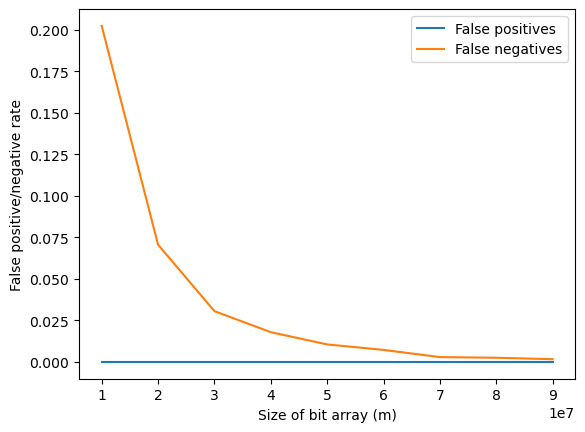

In [26]:
values_to_check = pd.read_csv('bloom_filter_check.csv', header=None)[0].values
insert_set = set(insert_lst)

m_values = range(int(1e7), int(1e8), int(1e7))

false_negatives, false_positives = test_bloom_filter(m_values, values_to_check, insert_set)

plot_false_positives_and_negatives(m_values, false_positives, false_negatives)


Inserted all values for m =  10000000


100%|██████████| 300000/300000 [00:00<00:00, 1120313.40it/s]


Inserted all values for m =  11000000


100%|██████████| 300000/300000 [00:00<00:00, 1099188.12it/s]


Inserted all values for m =  12000000


100%|██████████| 300000/300000 [00:00<00:00, 1128947.67it/s]


Inserted all values for m =  13000000


100%|██████████| 300000/300000 [00:00<00:00, 1003787.82it/s]


Inserted all values for m =  14000000


100%|██████████| 300000/300000 [00:00<00:00, 1014219.32it/s]


Inserted all values for m =  15000000


100%|██████████| 300000/300000 [00:00<00:00, 1127794.14it/s]


Inserted all values for m =  16000000


100%|██████████| 300000/300000 [00:00<00:00, 1110666.91it/s]


Inserted all values for m =  17000000


100%|██████████| 300000/300000 [00:00<00:00, 1077264.45it/s]


Inserted all values for m =  18000000


100%|██████████| 300000/300000 [00:00<00:00, 1116336.71it/s]


Inserted all values for m =  19000000


100%|██████████| 300000/300000 [00:00<00:00, 969051.59it/s] 


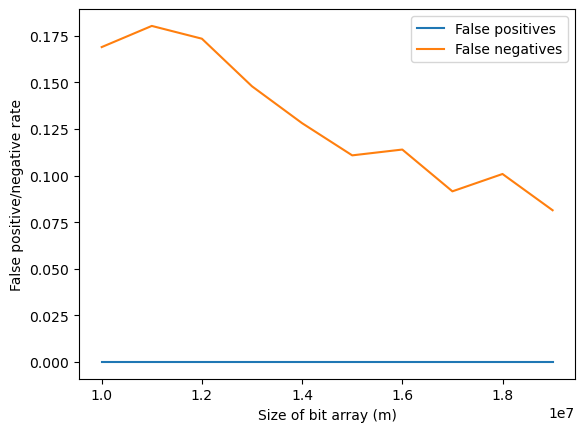

In [27]:
m_values = range(int(1e7), int(2e7), int(1e6))
false_negatives, false_positives = test_bloom_filter(m_values, values_to_check, insert_set)
plot_false_positives_and_negatives(m_values, false_positives, false_negatives)

In [30]:
print(list(zip(m_values, false_negatives)))

[(10000000, 0.16899666666666666), (11000000, 0.18035333333333334), (12000000, 0.17349333333333333), (13000000, 0.14794333333333334), (14000000, 0.12814666666666666), (15000000, 0.11087666666666667), (16000000, 0.11399666666666666), (17000000, 0.09156666666666667), (18000000, 0.10087666666666667), (19000000, 0.08141)]


Inserted all values for m =  16000000


100%|██████████| 300000/300000 [00:00<00:00, 1152364.69it/s]


Inserted all values for m =  16100000


100%|██████████| 300000/300000 [00:00<00:00, 1101552.41it/s]


Inserted all values for m =  16200000


100%|██████████| 300000/300000 [00:00<00:00, 1144344.26it/s]


Inserted all values for m =  16300000


100%|██████████| 300000/300000 [00:00<00:00, 1135108.13it/s]


Inserted all values for m =  16400000


100%|██████████| 300000/300000 [00:00<00:00, 1030739.90it/s]


Inserted all values for m =  16500000


100%|██████████| 300000/300000 [00:00<00:00, 1108257.51it/s]


Inserted all values for m =  16600000


100%|██████████| 300000/300000 [00:00<00:00, 1104014.07it/s]


Inserted all values for m =  16700000


100%|██████████| 300000/300000 [00:00<00:00, 1120611.72it/s]


Inserted all values for m =  16800000


100%|██████████| 300000/300000 [00:00<00:00, 1140849.84it/s]


Inserted all values for m =  16900000


100%|██████████| 300000/300000 [00:00<00:00, 1103866.85it/s]


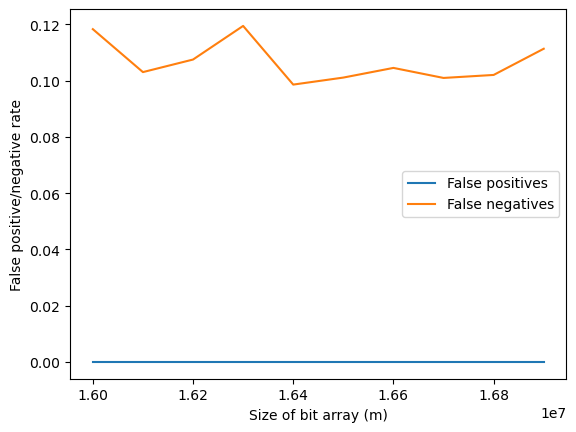

In [31]:
m_values = range(16000000, 17000000, 100000)
false_negatives, false_positives = test_bloom_filter(m_values, values_to_check, insert_set)
plot_false_positives_and_negatives(m_values, false_positives, false_negatives)

In [ ]:
print(list(zip(m_values, false_negatives)))